Text(0, 0.5, '$y$')

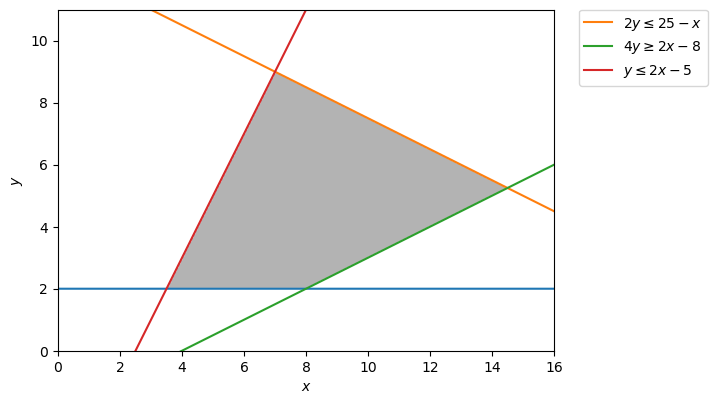

In [1]:
import numpy as np
import matplotlib.pyplot as plt


d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (2*y<=25-x) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 16, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# 20000*x + 45000*y fungsi objectif
# x,y >=0
# 4x+5y <= 30 Designer -> y<=(-4x+30)/5
# 3x+6y <=30 Engineer -> y<=(-3x+30)/6
# 2x+7y <=30 Machine -> y<=(-2x+30)/7

Text(0, 0.5, '$y$')

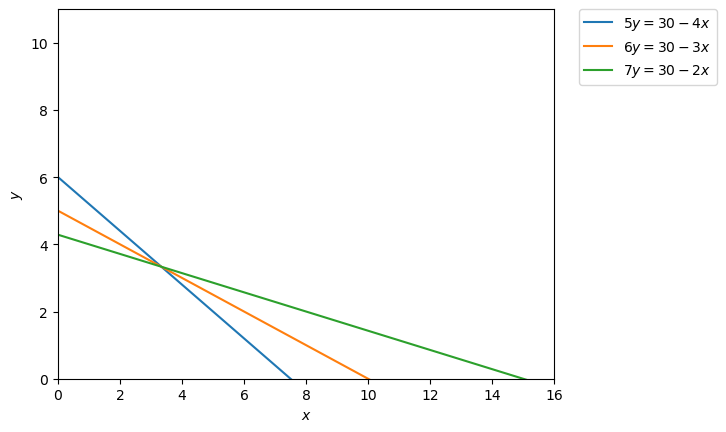

In [12]:
x = np.linspace(0, 16, 2000)
# y<=(-4x+30)/5
y1 = (-4*x+30)/5.0
# y<=(-3x+30)/6
y2 =(-3*x+30)/6.0
# 4y >= 2x - 8 
y3 =(-2*x+30)/7.0


#plt.plot(x, 2*np.ones_like(y1))
plt.plot(x, y1, label=r'$5y= 30-4x$')
plt.plot(x, y2, label=r'$6y= 30-3x$')
plt.plot(x, y3, label=r'$7y= 30-2x$')
plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

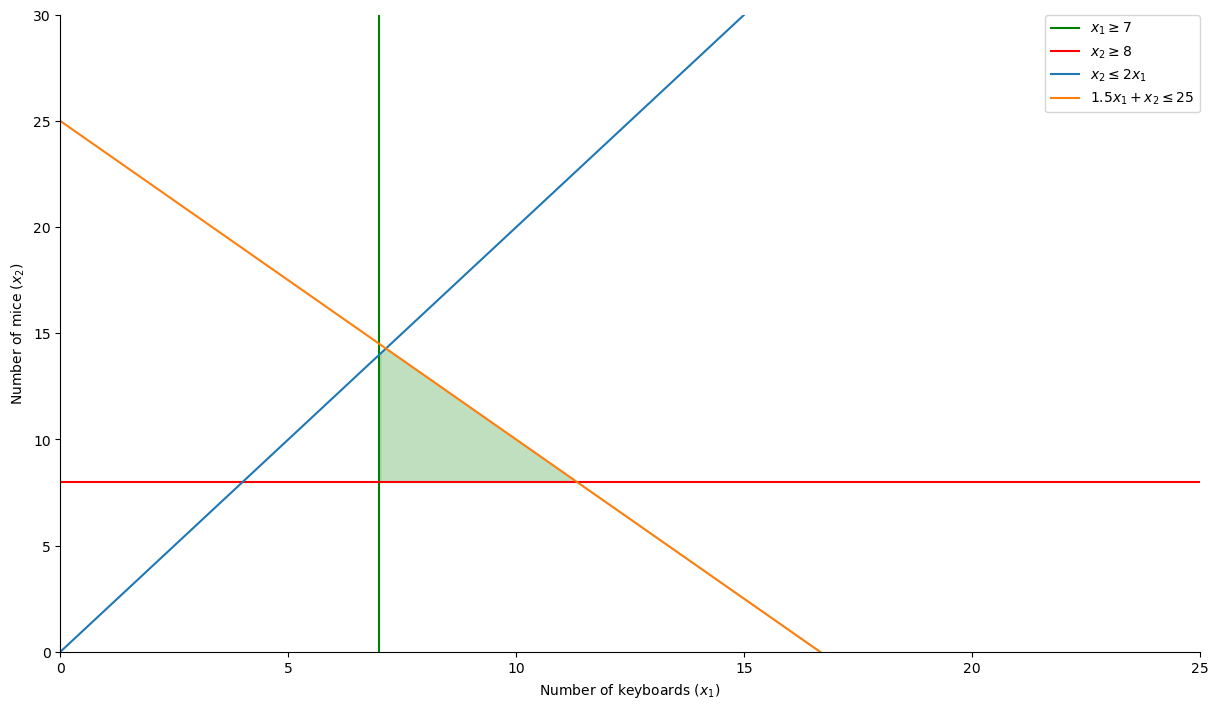

In [3]:
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# draw constraints
plt.axvline(7, color='g', label=r'$x_1 \geq 7$') # constraint 1
plt.axhline(8, color='r', label=r'$x_2 \geq 8$') # constraint 2
plt.plot(x_1, (2*(x_1)), label=r'$x_2 \leq 2x_1$') # constraint 3
plt.plot(x_1, 25 - (1.5*x_1), label=r'$1.5x_1 + x_2 \leq 25$') # constraint 4


plt.xlim((0, 25))
plt.ylim((0, 30))
plt.xlabel(r'Number of keyboards ($x_1$)')
plt.ylabel(r'Number of mice ($x_2$)')

# fill in the fesaible region
plt.fill_between(x_1, np.minimum(25 - (1.5*x_1), (2*(x_1))), np.minimum(25 - (1.5*x_1), 8), 
where=x_1 >= 7,
color='green', alpha=0.25)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

#Contoh Soal Maksimum
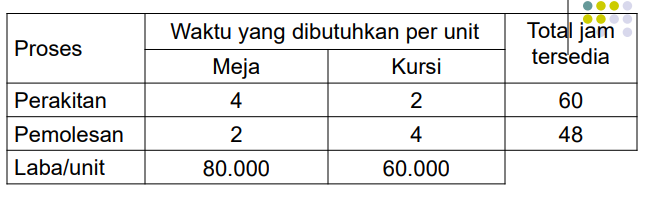

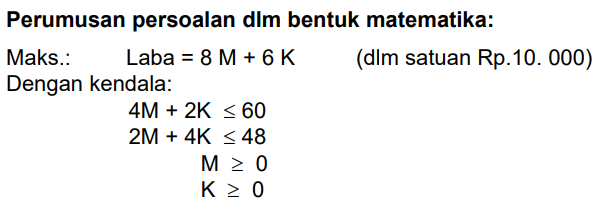

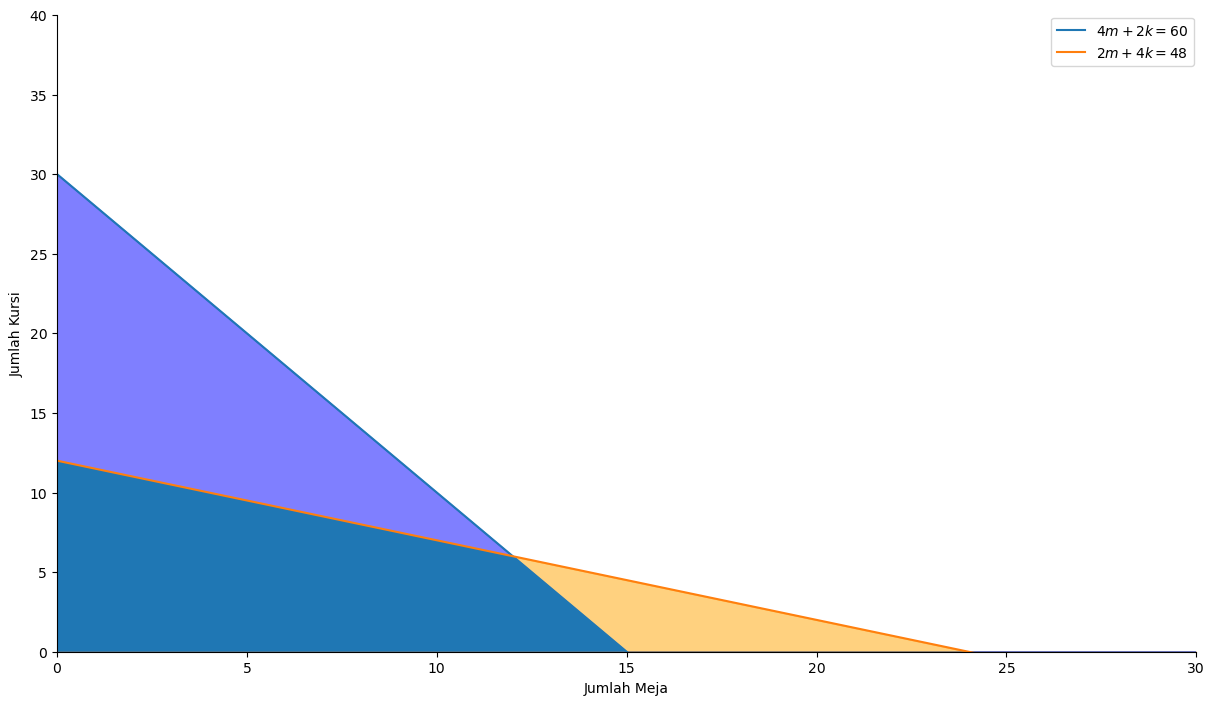

In [4]:
m = np.linspace(0, 30, 1000)
k = np.linspace(0, 30, 1000)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# draw constraints
#plt.axvline(7, color='g', label=r'$x_1 \geq 7$') # constraint 1
#plt.axhline(8, color='r', label=r'$x_2 \geq 8$') # constraint 2
plt.plot(m, ((-4*(m)+60)/2), label=r'$ 4m +2k = 60$') # constraint 3
plt.fill_between(m, (-4*(m)+60)/2, where=m >= 0, color='blue', alpha=0.5)
plt.plot(m, (48 - (2*m))/4, label=r'$ 2m +4k = 48$') # constraint 4
plt.fill_between(m, (48 - (2*m))/4, where=m >= 0, color='orange', alpha=0.5)
plt.xlim(0,30)
plt.ylim(0,40)
plt.xlabel(r'Jumlah Meja')
plt.ylabel(r'Jumlah Kursi')

# fill in the fesaible region
plt.fill_between(m, np.minimum((-4*(m)+60)/2, (48 - (2*m))/4), where=m >= 0)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.2)

# Hide the right and top spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
plt.show()

In [5]:
from pulp import *
prob = LpProblem('Penjualan_meja_kursi', LpMaximize)

In [6]:
x = LpVariable('Meja', lowBound=0, cat=LpInteger)
y = LpVariable('Kursi', lowBound=0, cat=LpInteger)

In [7]:
#Fungsi Objektif
prob += 80000*x +60000*y

#konstrain
prob += 4*x + 2*y <= 60
prob += 2*x + 4*y <= 48

In [8]:
prob

Penjualan_meja_kursi:
MAXIMIZE
60000*Kursi + 80000*Meja + 0
SUBJECT TO
_C1: 2 Kursi + 4 Meja <= 60

_C2: 4 Kursi + 2 Meja <= 48

VARIABLES
0 <= Kursi Integer
0 <= Meja Integer

In [9]:
print('Current Status: ', LpStatus[prob.status])

Current Status:  Not Solved


In [10]:
prob.solve()
print("Jumlah Meja: ", x.varValue)
print("Jumlah Kursi: ", y.varValue)
print("Total Profit: ", value(prob.objective))

Jumlah Meja:  12
Jumlah Kursi:  6
Total Profit:  1320000


In [11]:
print('Current Status: ', LpStatus[prob.status])

Current Status:  Optimal


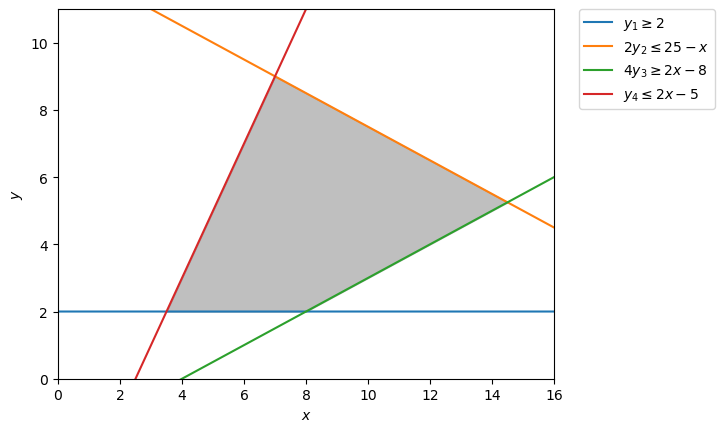

In [26]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y_1\geq2$')
plt.plot(x, y2, label=r'$2y_2\leq25-x$')
plt.plot(x, y3, label=r'$4y_3\geq 2x - 8$')
plt.plot(x, y4, label=r'$y_4\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)